In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [28]:
# get simulation and regression data
data = np.load('robot_data.npz')
# np.savez('robot_data.npz', Y_link7=regressor_link7_all, Y=regressor_all, 
#             a_link7=a_link7_pred,a=a_pred,
#             u_link7=tau_mes_link7_all,u_link7_pred=tau_mes_link7_pred,u=tau_mes_all,u_pred=tau_mes_all_pred)
Y_link7 = data['Y_link7']
Y = data['Y']
a_link7_pred = data['a_link7']
a_pred = data['a_pred']
u_link7 = data['u_link7']
u_link7_pred = data['u_link7_pred']
u = data['u']
u_pred = data['u_pred']
a_true = data['a_true'] 
print('shape:\nY_link7',  Y_link7.shape)
print('Y',  Y.shape)
print('a_link7_pred', a_link7_pred.shape)
print('a_pred', a_pred.shape)
print('a_true', a_true.shape)
print('u_link7', u_link7.shape)
print('u_link7_pred', u_link7_pred.shape)
print('u', u.shape)
print('u_pred', u_pred.shape)

shape:
Y_link7 (70007, 10)
Y (70007, 70)
a_link7_pred (10, 1)
a_pred (70, 1)
a_true (70,)
u_link7 (10001, 1)
u_link7_pred (10001, 1)
u (70007, 1)
u_pred (70007, 1)


In [29]:
a_link7_true = a_true[-10:]

In [30]:
a_link7_true

array([0.45, 0.  , 0.  , 0.  , 0.6 , 0.  , 0.6 , 0.  , 0.  , 0.6 ])

In [31]:
#compare prediction by numbers
combined = np.hstack((a_link7_true.reshape(-1, 1), np.round(a_link7_pred, 2)))
print("True vs Predicted:\n", combined)

True vs Predicted:
 [[ 0.45  0.45]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.6   0.6 ]
 [ 0.   -0.  ]
 [ 0.6   0.6 ]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.6   0.6 ]]


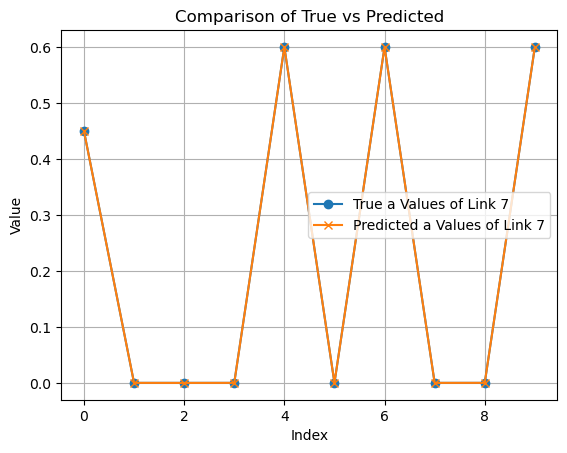

In [32]:
#part 1 begin
#compare predicted a parameters of link 7 to true value
plt.plot(a_link7_true, label='True a Values of Link 7', marker='o')
plt.plot(a_link7_pred, label='Predicted a Values of Link 7', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

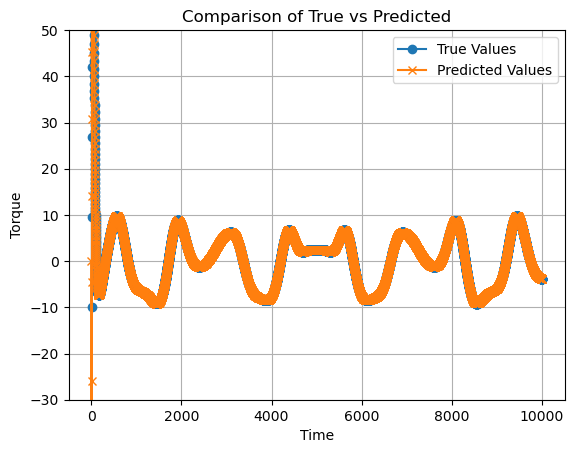

In [33]:
#compare predicted torque of link 7 to true value
plt.plot(u_link7, label='True Values', marker='o')
plt.plot(u_link7_pred, label='Predicted Values', marker='x')
plt.xlabel('Time')
plt.ylabel('Torque')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.ylim(-30,50)
plt.show()

In [15]:
#calculate  F-statistics for link 7 regression
u_mean = np.mean(u_link7)
TSS = np.sum((u_link7 - u_mean)**2)
RSS = np.sum((u_link7 - u_link7_pred)**2)
n, p = Y_link7.shape
F_stat = ((TSS - RSS) / p) / (RSS / (n - p))
print("F-statistic =", F_stat)

F-statistic = 29920.192804295046


In [16]:
#Adjusted R-squared for link 7 regression
R_squared = 1-RSS/TSS
Adj_R_squared = 1-((1-R_squared)*(n)/(n-p))
print("Adj_R_squared =", Adj_R_squared)

Adj_R_squared = 0.8103813562756179


In [17]:
#Confidence intervals
sigma_squared = np.sum((u_link7 - u_link7_pred)**2)/(n-p)
XtX_inv = np.linalg.pinv(Y_link7.T @ Y_link7)
SE = np.sqrt(np.maximum(0, np.diag(XtX_inv) * sigma_squared)).reshape(p,1)
confidence = 0.95          # confidence interval
alpha = 1 - confidence      # 
t_star = t.ppf(1 - alpha / 2, n-p)
CI = np.column_stack([a_link7_pred  - t_star * SE, a_link7_pred  + t_star * SE])
print("CI", CI)
number_in_CI = 0
eps = 1e-10
for i in range(len(a_link7_true)):
    if(CI[i][0]-eps<=a_link7_true[i]<=CI[i][1]+eps):
        number_in_CI+=1
        print(i)
print(number_in_CI,number_in_CI/len(a_link7_true))

CI [[ 0.43944039  0.46015272]
 [-0.00334609  0.00324732]
 [-0.00240621  0.00215702]
 [-0.00219458  0.00211322]
 [ 0.59819039  0.60211408]
 [-0.00181186  0.00164319]
 [ 0.59750331  0.60263657]
 [-0.00206238  0.00190166]
 [-0.00160457  0.00159023]
 [ 0.5969728   0.60331646]]
0
1
2
3
4
5
6
7
8
9
10 1.0


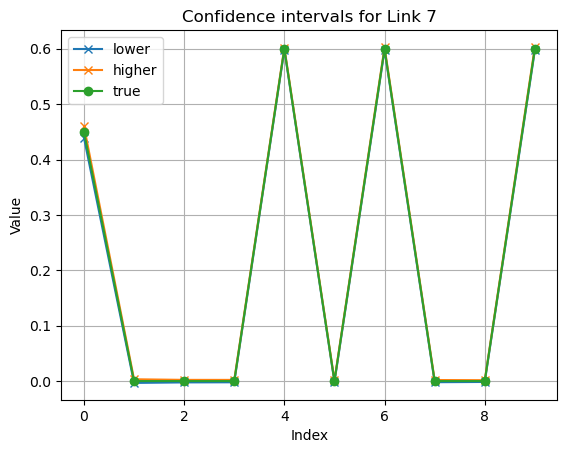

In [18]:
#compare predicted a parameters of link 7 to true value
plt.plot(CI[:,0] , label='lower', marker='x')
plt.plot(CI[:,1], label='higher', marker='x')
plt.plot(a_link7_true, label='true', marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Confidence intervals for Link 7')
plt.legend()
plt.grid(True)
plt.show()

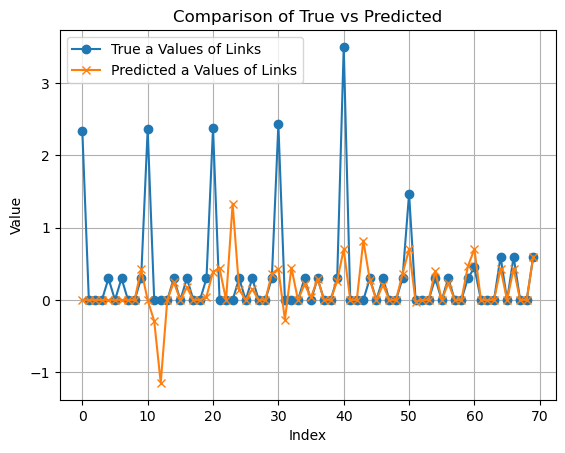

In [19]:
#part 2 begin
#compare predicted a parameters of all links to true value
plt.plot(a_true, label='True a Values of Links', marker='o')
plt.plot(a_pred, label='Predicted a Values of Links', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#compare prediction by numbers
combined = np.hstack((a_true.reshape(-1, 1), np.round(a_pred, 2)))
print("True vs Predicted:\n", combined)

True vs Predicted:
 [[ 2.34 -0.  ]
 [ 0.    0.  ]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.3  -0.  ]
 [ 0.   -0.  ]
 [ 0.3   0.  ]
 [ 0.    0.  ]
 [ 0.   -0.  ]
 [ 0.3   0.42]
 [ 2.36  0.  ]
 [ 0.   -0.29]
 [ 0.   -1.15]
 [ 0.   -0.  ]
 [ 0.3   0.25]
 [ 0.   -0.  ]
 [ 0.3   0.18]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.3   0.05]
 [ 2.38  0.39]
 [ 0.    0.44]
 [ 0.   -0.  ]
 [ 0.    1.33]
 [ 0.3   0.14]
 [ 0.   -0.  ]
 [ 0.3   0.15]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.3   0.37]
 [ 2.43  0.43]
 [ 0.   -0.27]
 [ 0.    0.45]
 [ 0.   -0.  ]
 [ 0.3   0.22]
 [ 0.    0.04]
 [ 0.3   0.29]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.3   0.27]
 [ 3.5   0.7 ]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.    0.82]
 [ 0.3   0.27]
 [ 0.   -0.  ]
 [ 0.3   0.21]
 [ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.3   0.36]
 [ 1.47  0.7 ]
 [ 0.   -0.02]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.3   0.4 ]
 [ 0.   -0.  ]
 [ 0.3   0.23]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.3   0.46]
 [ 0.45  0.71]
 [ 0.   -0.  ]
 [ 0.   -0.  ]
 [ 0.    0.  ]
 [ 0.6   0.43]
 [ 0.

In [21]:
#calculate  F-statistics for all link regression
u_all_mean = np.mean(u)
TSS = np.sum((u - u_all_mean)**2)
RSS = np.sum((u - u_pred)**2)
n, p = Y.shape
#F_stat = ((TSS - RSS) / p) / (RSS / (n - p -1))
F_stat = ((TSS - RSS) / p) / (RSS / (n - p))
print("F-statistic =", F_stat)

F-statistic = 5183.767329393841


In [22]:
#Adjusted R-squared for all link regression
R_squared = 1-RSS/TSS
#Adj_R_squared_all = 1-((1-R_squared)*(n-1)/(n-p-1))
Adj_R_squared_all = 1-((1-R_squared)*(n)/(n-p))
print("Adj_R_squared =", Adj_R_squared_all)

Adj_R_squared = 0.8382465696384191


In [23]:
#Confidence intervals
sigma_squared = np.sum((u- u_pred)**2)/(n-p)
XtX_inv = np.linalg.pinv(Y.T @ Y)
SE = np.sqrt(np.maximum(0, np.diag(XtX_inv) * sigma_squared)).reshape(p,1)
confidence = 0.95           # confidence interval
alpha = 1 - confidence      # 
t_star = t.ppf(1 - alpha / 2, n-p)
CI = np.column_stack([a_pred  - t_star * SE, a_pred  + t_star * SE])
print("CI", CI)
number_in_CI = 0
eps = 1e-10
for i in range(len(a_true)):
    if(CI[i][0]-eps<=a_true[i]<=CI[i][1]+eps):
        number_in_CI+=1
print(number_in_CI,number_in_CI/len(a_true))

CI [[-1.11169121e-16 -1.11169121e-16]
 [ 9.52168775e-15  9.52168775e-15]
 [-9.82290106e-15 -9.82290106e-15]
 [ 4.88828193e-16  4.88828193e-16]
 [-4.82958118e-15 -4.82958118e-15]
 [-4.47561950e-15 -4.47561950e-15]
 [ 5.34318113e-15  5.34318113e-15]
 [ 4.06225871e-15  4.06225871e-15]
 [-7.75095487e-15 -7.75095487e-15]
 [ 2.65828118e-01  5.81240310e-01]
 [-4.76385839e-13  4.84548197e-13]
 [-6.03886437e-01  2.28186578e-02]
 [-1.26095993e+00 -1.03118331e+00]
 [-9.65387415e-14  8.89048848e-14]
 [ 1.29298845e-01  3.67047255e-01]
 [-2.10205407e-01  2.09330485e-01]
 [-1.52628834e-02  3.65985212e-01]
 [-1.38635906e-01  1.37927629e-01]
 [-1.88652098e-01  1.90380720e-01]
 [-1.25982191e-01  2.20976471e-01]
 [ 3.69474440e-01  4.13891709e-01]
 [ 2.25000991e-01  6.51048562e-01]
 [-8.36576302e-02  8.35704202e-02]
 [ 1.28457114e+00  1.38129922e+00]
 [-2.77593010e-02  3.17647644e-01]
 [-1.30680844e-01  1.28755025e-01]
 [ 3.24803423e-02  2.68971694e-01]
 [-1.93983992e-01  1.94264874e-01]
 [-1.38109426e-01

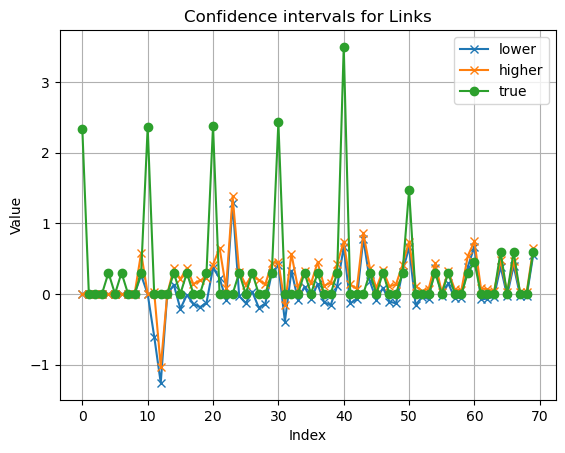

In [24]:
#compare predicted a parameters to true value
plt.plot(CI[:,0] , label='lower', marker='x')
plt.plot(CI[:,1], label='higher', marker='x')
plt.plot(a_true, label='true', marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Confidence intervals for Links')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#plot the torque prediction error for each joint (optional)
#process the display data on joint basis
u_disp = u.reshape(-1,7)
u_pred_disp  = u_pred.reshape(-1,7)

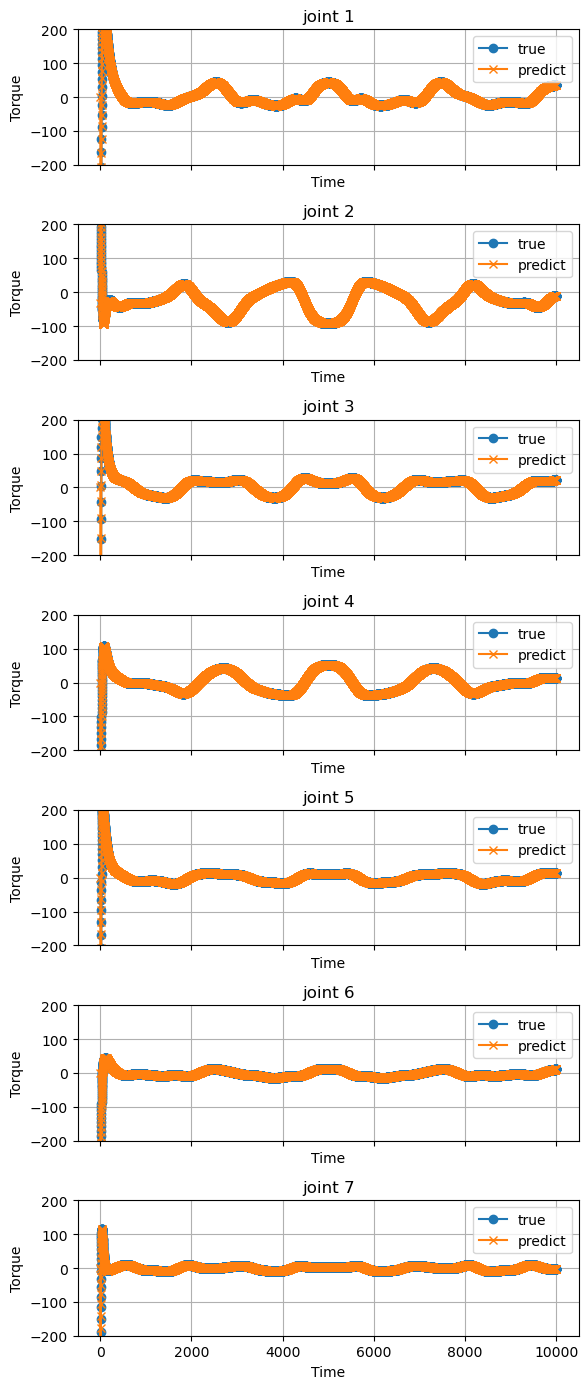

In [26]:
#show torqur values
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(6, 14), sharex=True)
for i, ax in enumerate(axes.flat):
    ax.plot(u_disp[:,i] , label='true', marker='o')
    ax.plot(u_pred_disp[:,i] , label='predict', marker='x')
  
    ax.set_title(f'joint {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Torque')
    ax.legend()
    ax.grid()
    ax.set_ylim(-200,200)

plt.tight_layout()
plt.savefig("torque_comparison_all.png", dpi=300)
plt.show()

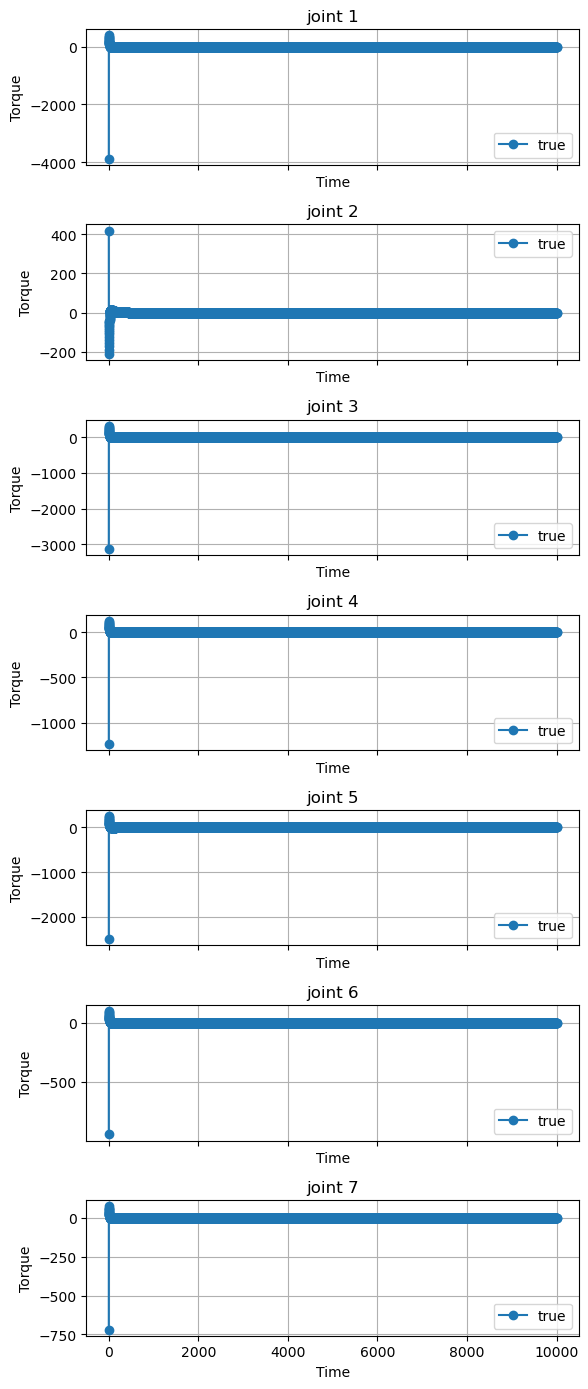

In [27]:
#show torque errors
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(6, 14), sharex=True)
for i, ax in enumerate(axes.flat):
    ax.plot(u_disp[:,i]-u_pred_disp[:,i] , label='true', marker='o')
    ax.set_title(f'joint {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Torque')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.savefig("torque_error.png", dpi=300)
plt.show()